In [11]:
#importing the librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [2]:
#importing the table
eurojobs = pd.read_csv(r'C:\\Users\\Iago Vale\\Desktop\\Ufes\\Projeto de extensão\\DS Ufes\\portfolio\\clustering analysis\\unsupervised-analysis\\dataset\\eurojobs.csv')

#### studying the dataset

In [3]:
#setting 'Country' as index
eurojobs.set_index('Country')

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
Country,,,,,,,,,
Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1
Italy,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1,5.7
Luxembourg,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2,6.2
Netherlands,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5,6.8
United Kingdom,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3,6.4


In [4]:
# printing informations from a DataFrame
eurojobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  26 non-null     object 
 1   Agr      26 non-null     float64
 2   Min      26 non-null     float64
 3   Man      26 non-null     float64
 4   PS       26 non-null     float64
 5   Con      26 non-null     float64
 6   SI       26 non-null     float64
 7   Fin      26 non-null     float64
 8   SPS      26 non-null     float64
 9   TC       26 non-null     float64
dtypes: float64(9), object(1)
memory usage: 2.2+ KB


In [5]:
# looking for null data in dataset
eurojobs.isnull().sum()

Country    0
Agr        0
Min        0
Man        0
PS         0
Con        0
SI         0
Fin        0
SPS        0
TC         0
dtype: int64

In [6]:
# generating descriptive statistics including those that summarize the central tendency
eurojobs.describe()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,19.130769,1.253846,27.007692,0.907692,8.165385,12.957692,4.000000,20.023077,6.546154
std,15.546569,0.970044,7.007763,0.376216,1.645586,4.575253,2.806564,6.829542,1.391469
min,2.700000,0.100000,7.900000,0.100000,2.800000,5.200000,0.500000,5.300000,3.200000
25%,7.700000,0.525000,23.000000,0.600000,7.525000,9.250000,1.225000,16.250000,5.700000
50%,14.450000,0.950000,27.550000,0.850000,8.350000,14.400000,4.650000,19.650000,6.700000
75%,23.675000,1.800000,30.200000,1.175000,8.975000,16.875000,5.925000,24.125000,7.075000
max,66.800000,3.100000,41.200000,1.900000,11.500000,19.100000,11.300000,32.400000,9.400000


#### EDA


The first EDA that I'm going to present is the heatmap. Heatmaps are used to if we have some relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.

But, what is that 'relationship'? 

The 'relationship' it's called **correlation**. Correlation is a statistical measure the strength between two variables. And the two types of correlation are positive and negative. 

- Positive: The positive correlation occurs when two variables moves in the same direction what means that, as one increases so do the other. For example: there is a positive correlation between exercising and being healthy.

- Negative: The negative correlation occurs when two variables move in opposite directions, what means that, as one increase the other one will decrease. For example: there is a negative correlation between smoking and life expectancy. 

<AxesSubplot:>

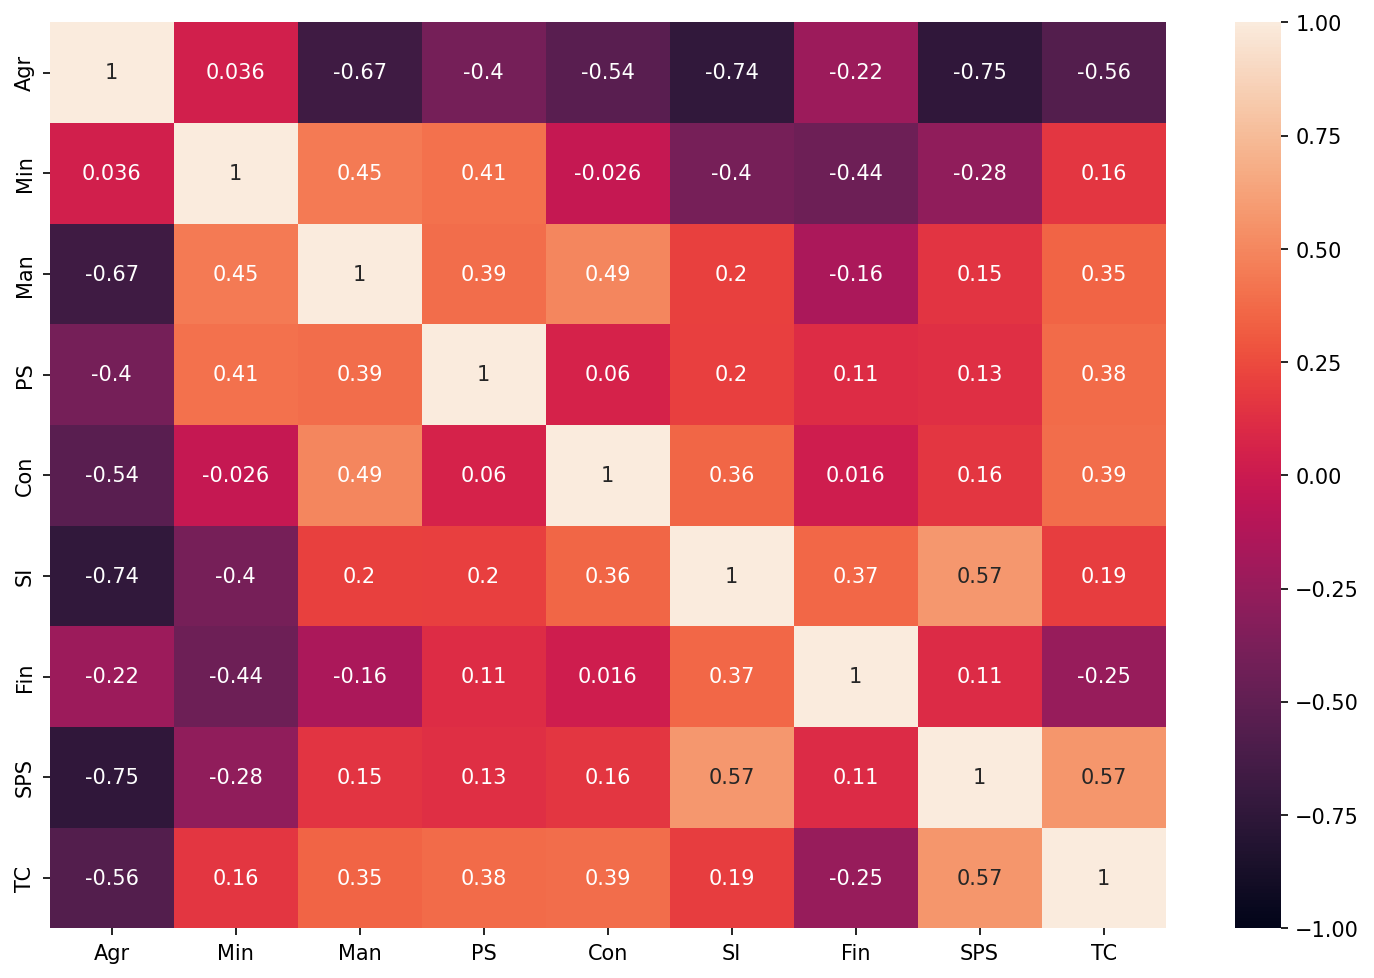

In [14]:
plt.figure(figsize=(12,8),dpi=150)
sns.heatmap(eurojobs.corr(),annot=True, vmin=-1, vmax=1)

So now, we are going to intepret this heatmap.

As you can see, we've got some variables that have significant positive correlations, like:
- Min: Man
- Min: PS
- Man: Con

We've got some variables that have significant negative correlations as well, like:
- Agr:Man
- Agr:Con
- Agr:Sl
- Agr:TC
- Min: Fin

Considering we have some pairs of variables, what these pairs of variables means? To explain I'm going to use the example of Min: Man. Knowing that 'Min' means the percentage employed in mining and 'Man' percentage of employees in manufacturing, we can conclude that as the percentage of employees increase in mining, the percentage of employees in manufacturing will also increase. The situation is the same if the percentage of the employed in mining decrease, the percentage of employees in manufacturing will also decrease.

In [16]:
#preparing for data normalization
eurojobs_mean = eurojobs.mean()
eurojobs_std = eurojobs.std()

C:\Users\Iago Vale\AppData\Local\Temp\ipykernel_33556\930367478.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  eurojobs_mean = eurojobs.mean()
C:\Users\Iago Vale\AppData\Local\Temp\ipykernel_33556\930367478.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  eurojobs_std = eurojobs.std()


In [18]:
#data normalized
eurojobs_normalized = (eurojobs - eurojobs_mean)/eurojobs_std

In [11]:
#distortions are SSE is the sum of the squared differences between each observation and its group's mean.
#it can be used as a measure of variation within a cluster. If all cases within a cluster are identical the SSE would then be equal to 0. (SSE)
#intertia_ seria a soma dos quadrados médio (SQM)
distortions =[]
K = range(1,25)

for k in K:
    kmeansModel = KMeans(n_clusters= k)
    kmeansModel.fit(eurojobs_normalized)
    distortions.append(kmeansModel.inertia_)

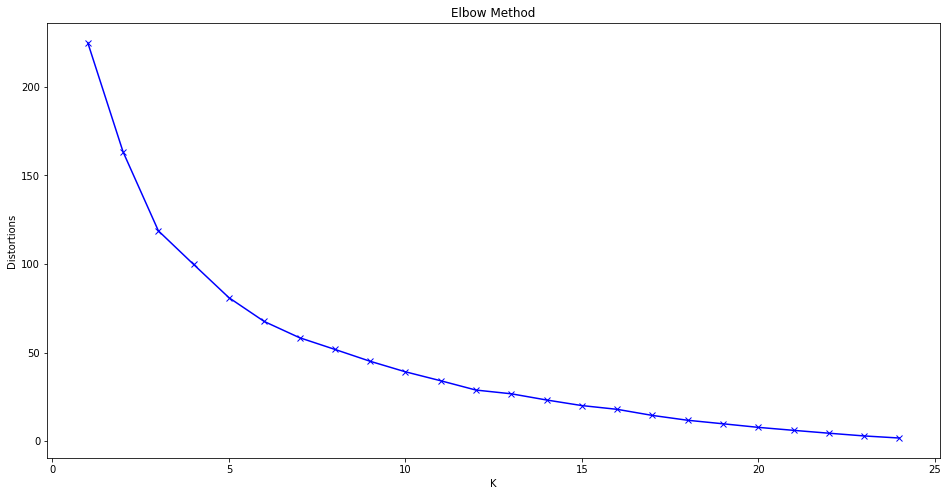

In [12]:
plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortions')
plt.title('Elbow Method')
plt.show()